<a href="https://colab.research.google.com/github/AbdurRahman22224/Academic-Result-webapp-Scrapper/blob/main/Data_Hackon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/content/global air pollution dataset.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [3]:
df.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [5]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [19]:
df.shape

(23463, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


### Q.1 *Calculate the Pollution Index (PI)* for a given row in the dataset using the formula:  PI = 0.98 * PM2.5 + 0.017 * CO + 0.158 * Ozone - 0.036 * NO2 - 0.604



In [9]:
# PI
df['Polln_Ind'] = 0.98 * df['PM2.5 AQI Value'] + 0.017 * df['CO AQI Value'] + 0.158 * df['Ozone AQI Value'] - 0.036 * df['NO2 AQI Value'] - 0.604
df[['Country','City','AQI Value','Polln_Ind']]

,Country,City,AQI Value,Polln_Ind
0,Russian Federation,Praskoveya,51,55.081
1,Brazil,Presidente Dutra,41,40.347
2,Italy,Priolo Gargallo,66,70.183
3,Poland,Przasnysz,34,24.385
4,France,Punaauia,22,8.752
...,...,...,...,...
23458,India,Gursahaiganj,184,204.027
23459,France,Sceaux,50,51.393
23460,India,Mormugao,50,51.853
23461,United States of America,Westerville,71,75.873


In [13]:
df[['AQI Value','Polln_Ind']]

,AQI Value,Polln_Ind
0,51,55.081
1,41,40.347
2,66,70.183
3,34,24.385
4,22,8.752
...,...,...
23458,184,204.027
23459,50,51.393
23460,50,51.853
23461,71,75.873


### Q.2 *Find the top 5 cities with the highest Pollution Index (PI) and compare the average pollution index of top 5 cities of USA, China and India.

In [146]:
top5 = df.sort_values(by=['Polln_Ind'], ascending=False)[['Country','City','AQI Value','Polln_Ind']]
top5_df = top5.head(5)
top5_df

,Country,City,AQI Value,Polln_Ind
611,India,Gunnaur,500,500.911
19635,India,Moradabad,500,500.279
18573,India,Tajpur,500,499.963
19540,India,Haldaur,500,499.331
15536,India,Gulaothi,500,499.137


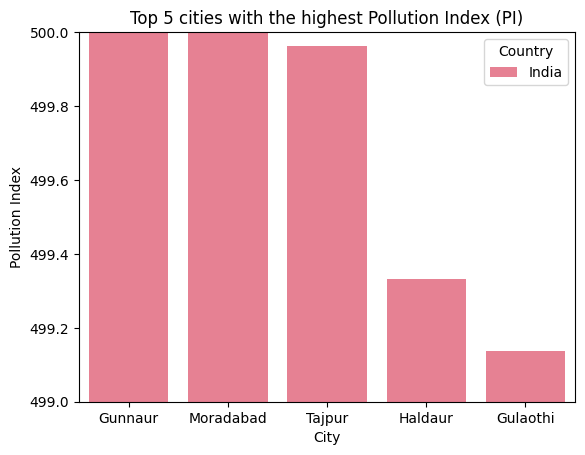

In [204]:
sns.barplot(data=top5_df, x='City', y='Polln_Ind', hue = 'Country', palette = 'husl')
plt.ylim(499, 500)
plt.xlabel("City")
plt.ylabel("Pollution Index")
plt.title('Top 5 cities with the highest Pollution Index (PI)')
plt.show()


In [148]:
top5_per_country = top5[(top5['Country'].isin(['United States of America', 'China', 'India']))]
data_avg = top5_per_country.groupby('Country')['Polln_Ind'].mean().sort_values(ascending=False).reset_index()
data_avg


,Country,Polln_Ind
0,India,154.528378
1,China,122.622311
2,United States of America,60.367701


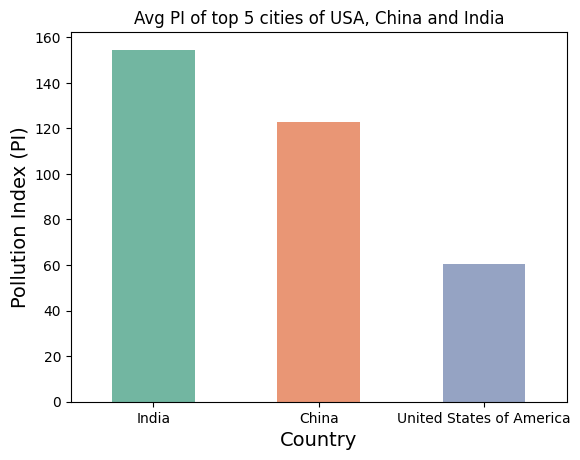

In [200]:
sns.barplot(x='Country', y='Polln_Ind', data=data_avg, hue = 'Country', width = 0.5, palette='Set2')

# Set title and labels
plt.title("Avg PI of top 5 cities of USA, China and India", fontsize=12)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Pollution Index (PI)", fontsize=14)

plt.show()

### Q.3 To get the top 10 countries based on the average PI of their citis

In [52]:
top_countries = df.groupby('Country')['Polln_Ind'].mean().reset_index().sort_values(by='Polln_Ind', ascending=False).head(10)
print(top_countries)


                  Country   Polln_Ind
126     Republic of Korea  403.279000
11                Bahrain  203.628000
116              Pakistan  183.089756
98             Mauritania  179.331750
82                 Kuwait  179.144667
163  United Arab Emirates  174.139333
125                 Qatar  165.871000
7                   Aruba  162.770000
134          Saudi Arabia  157.872000
69                  India  154.528378


<ipython-input-55-5b1a4760f1aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_countries, x ='Polln_Ind', y = 'Country' , palette='hls')


Text(0.5, 1.0, 'Top 10 countries based on the average Pollution Index of their cities')

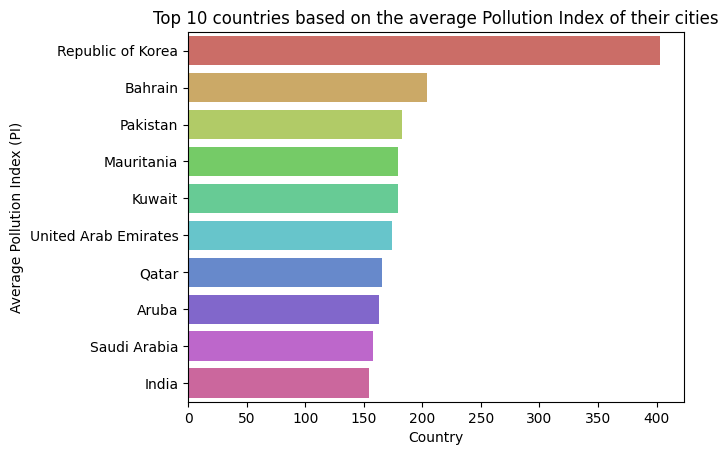

In [55]:
sns.barplot(data = top_countries, x ='Polln_Ind', y = 'Country' , palette='hls')
plt.xlabel("Country")
plt.ylabel("Average Pollution Index (PI)")
plt.title('Top 10 countries based on the average Pollution Index of their cities')

### Q.4 Examine the distribution of cities across different AQI categories for each country, and identify the top 10 cities categorized as 'Good' in terms of the frequency of occurrences

In [180]:
aqi_df = df.groupby(['Country','AQI Category'])['AQI Category'].count().sort_values(ascending=False).reset_index(name='count').sort_values(by= 'count', ascending=False)
aqi_df_10 = aqi_df[aqi_df['AQI Category'] == 'Good'].head(10)

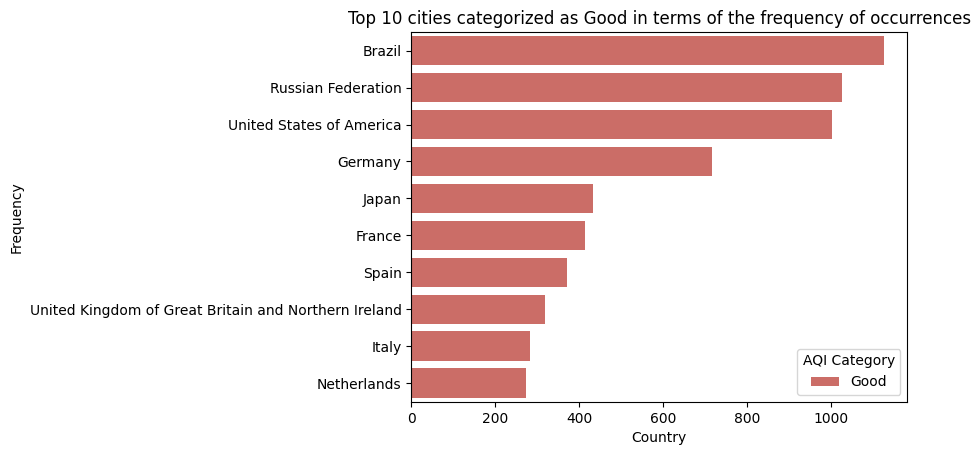

In [201]:
sns.barplot(data=aqi_df_10, y='Country', x='count', hue = 'AQI Category', palette='hls')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title('Top 10 cities categorized as Good in terms of the frequency of occurrences')
plt.show()

### Q. 5 Identify and display the top 10 cities categorized as 'Unhealthy' or 'Unhealthy for Sensitive Groups' based on their AQI (Air Quality Index) values

In [213]:
aqi_df_10_Unhealthy = aqi_df[aqi_df['AQI Category'].isin(['Unhealthy','Unhealthy for Sensitive Groups'])].head(10)
aqi_df_10_Unhealthy

,Country,AQI Category,count
2,India,Unhealthy,1101
11,India,Unhealthy for Sensitive Groups,383
16,China,Unhealthy,294
22,Pakistan,Unhealthy,229
28,China,Unhealthy for Sensitive Groups,183
35,United States of America,Unhealthy for Sensitive Groups,137
54,Mexico,Unhealthy,86
63,Indonesia,Unhealthy,73
71,Mexico,Unhealthy for Sensitive Groups,58
77,Iran (Islamic Republic of),Unhealthy for Sensitive Groups,50


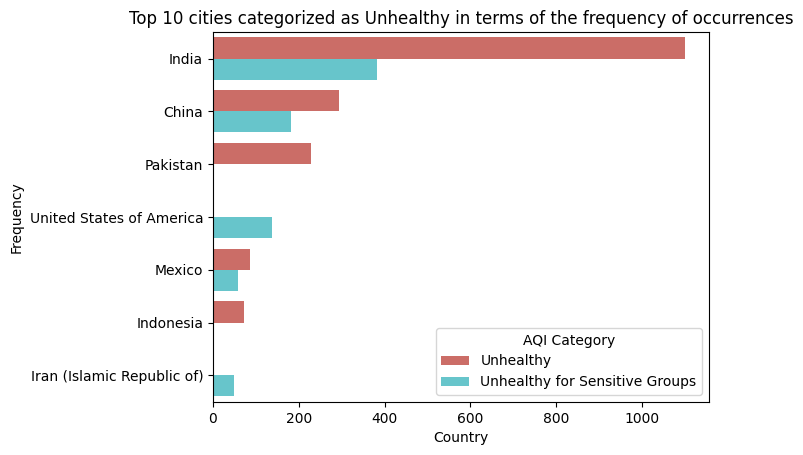

In [212]:
sns.barplot(data=aqi_df_10_Unhealthy, y='Country', x='count', hue = 'AQI Category', palette='hls')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title('Top 10 cities categorized as Unhealthy in terms of the frequency of occurrences')
plt.show()

### Q.6 Analyze the interrelationships between key air quality indicators by computing the correlation matrix for PM2.5, NO2, and CO AQI values. Visualize the results using a heatmap to interpret the strength and direction of these correlations.

Correlation Matrix:
                 PM2.5 AQI Value  NO2 AQI Value  AQI Value  CO AQI Value  \
PM2.5 AQI Value         1.000000       0.259084   0.984518      0.437751   
NO2 AQI Value           0.259084       1.000000   0.230845      0.487627   
AQI Value               0.984518       0.230845   1.000000      0.429643   
CO AQI Value            0.437751       0.487627   0.429643      1.000000   
Ozone AQI Value         0.340488      -0.182934   0.405086      0.144838   

                 Ozone AQI Value  
PM2.5 AQI Value         0.340488  
NO2 AQI Value          -0.182934  
AQI Value               0.405086  
CO AQI Value            0.144838  
Ozone AQI Value         1.000000  


Text(0.5, 1.0, 'Correlation Heatmap of Air Pollutants')

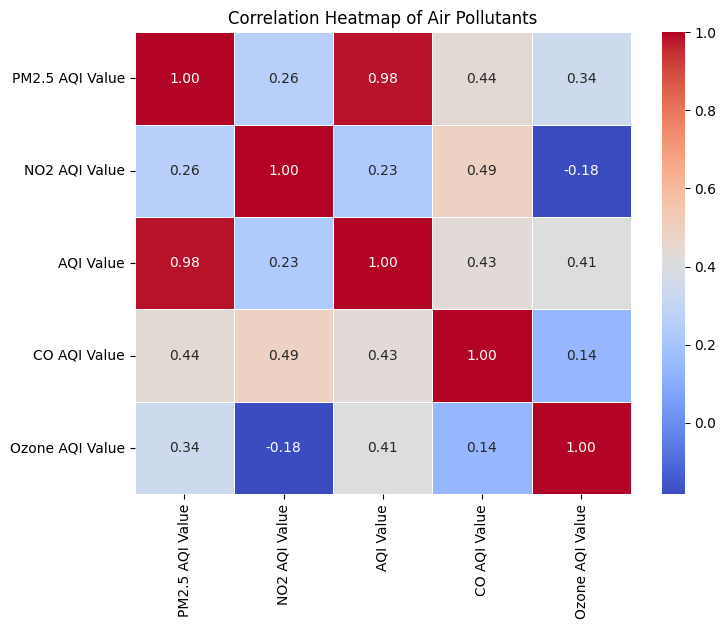

In [206]:
corr_columns = ["PM2.5 AQI Value", "NO2 AQI Value",'CO AQI Value']
correlation_matrix = df[corr_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Pollutants")


### Q.7 How can you assess and visualize the underlying distribution of the Pollution Index (PI) by estimating its probability density, using appropriate statistical methods to create a smooth, continuous representation of its frequency?.


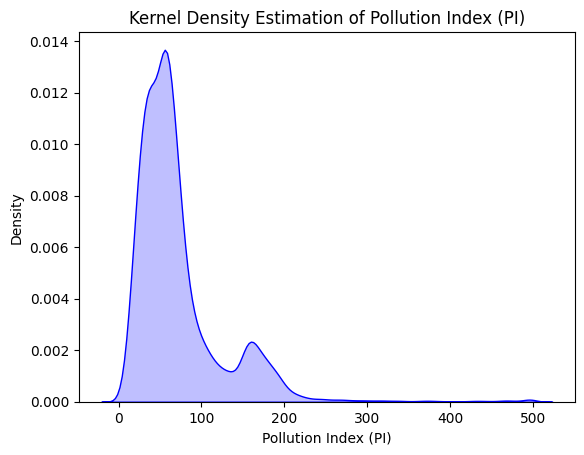

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(df['Polln_Ind'], fill=True, color='blue')


plt.title('Kernel Density Estimation of Pollution Index (PI)')
plt.xlabel('Pollution Index (PI)')
plt.ylabel('Density')

plt.show()

#### Inference from the plot
* Right-skewed (positively skewed) distribution
* The sharp peak near zero suggests that most cities have a low Pollution Index
(PI).
* A secondary bump around 150-200 indicates another concentration of cities with moderate pollution levels.
* The long tail extending to 500 suggests that a few cities have extremely high pollution levels.

### Q.8 Perform a hypothesis test to check if the mean Pollution Index (PI) of cities in one country (e.g., India) is significantly higher than in another country (e.g., the USA).


In [9]:
import scipy.stats as stats


india_PI = df[df['Country'] == 'India']['Polln_Ind'].dropna()
usa_PI = df[df['Country'] == 'United States of America']['Polln_Ind'].dropna()


if india_PI.empty or usa_PI.empty:
    print("One of the groups has no valid data. Please check the dataset.")
else:

    t_stat, p_value = stats.ttest_ind(india_PI, usa_PI, alternative='greater')


    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")


    alpha = 0.05  # significance level
    if p_value < alpha:
        print("Reject the null hypothesis: The mean Pollution Index in India is significantly higher than in the USA.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in mean Pollution Index between India and the USA.")

T-statistic: 56.111092181084324
P-value: 0.0
Reject the null hypothesis: The mean Pollution Index in India is significantly higher than in the USA.


### Q.9 Conduct a robust statistical analysis to examine the dispersion, central tendency, and potential anomalies within the Pollution Index (PI) dataset using an appropriate visualization technique


<ipython-input-27-2fb97c27d130>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Polln_Ind', fill = True, palette="Set2")


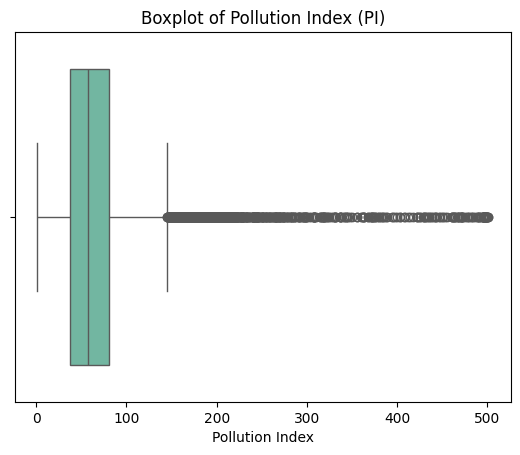

In [27]:
sns.boxplot(data = df, x = 'Polln_Ind', fill = True, palette="Set2")
plt.title('Boxplot of Pollution Index (PI)')
plt.xlabel('Pollution Index')
plt.show()

### Q.10 Perform a regression analysis to determine how much PM2.5 AQI contributes to the overall AQI value. Use a linear regression model and interpret the coefficient of determination (R²).


Regression Coefficient (Slope): 1.0078
Intercept: 2.9219
R² Score: 0.9693


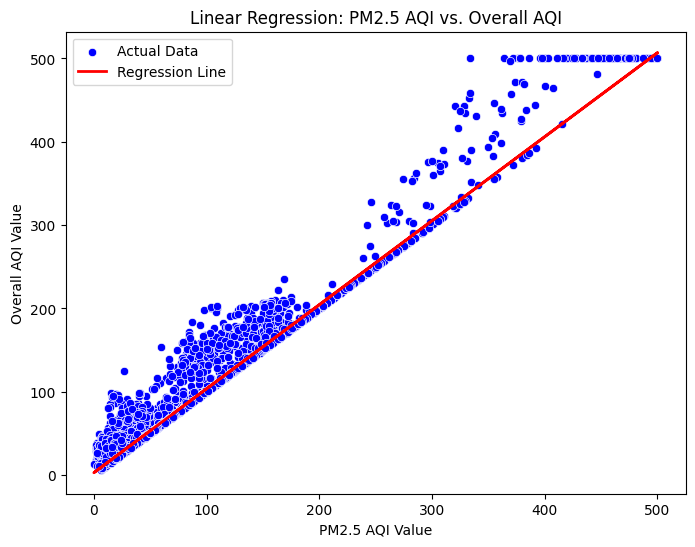

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = df[['PM2.5 AQI Value']]  # Predictor variable
y = df['AQI Value']          # Target variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# R² Score (coefficient of determination)
r2 = r2_score(y, y_pred)

# Print the regression coefficient and R² value
print(f"Regression Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PM2.5 AQI Value'], y=df['AQI Value'], color='blue', label="Actual Data")
plt.plot(df['PM2.5 AQI Value'], y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("Overall AQI Value")
plt.title("Linear Regression: PM2.5 AQI vs. Overall AQI")
plt.legend()
plt.show()

* This means that 96.93% of the variation in AQI Value can be explained by PM2.5 AQI Value.
* A high R² value (close to 1.0) indicates that PM2.5 is the primary determinant of AQI in this dataset.
* The remaining 3.07% of variability could be due to other pollutants (NO₂, CO, Ozone, etc.) or external environmental factors.
